# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv('key.env')

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

type(alpaca_api_key)


str

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
#BTC ->1.2  ETH->5.3
my_btc = 1.2
my_eth = 5.3



In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_data
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price


# Compute current value of my cryto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57716.40
The current value of your 5.3 ETH is $13257.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares -  110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion
#SPY->110 AGG->200

shares_data = {
    "shares": [200,110]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,110


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [10]:
# Format current date as ISO format
today = pd.Timestamp("2024-02-09", tz="America/New_York").isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]== "AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]== "SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis = 1, keys=["AGG", "SPY"])

# Preview DataFrame
display(df_portfolio)

AGG                                             \
                           close   high     low trade_count   open   volume   
timestamp                                                                     
2024-02-09 05:00:00+00:00  97.63  97.63  97.495       23695  97.54  7119634   

                                        SPY                              \
                                vwap  close    high     low trade_count   
timestamp                                                                 
2024-02-09 05:00:00+00:00  97.572449  501.2  501.65  498.49      466690   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-02-09 05:00:00+00:00  498.84  63961429  500.320186

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"].iloc[0]["close"])
spy_close_price= float(df_portfolio["SPY"].iloc[0]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.63
Current SPY closing price: $501.2


In [12]:
# Compute the current value of shares
my_agg_value = spy_close_price * df_shares.loc['AGG']['shares']
my_spy_value = spy_close_price * df_shares.loc['SPY']['shares']

my_spy = df_shares.loc['SPY']['shares']
my_agg = df_shares.loc['AGG']['shares']

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 110 SPY shares is $55132.00
The current value of your 200 AGG shares is $100240.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_stock_bond = my_spy_value + my_agg_value

#create a list called savings_data
savings_data = [total_crypto,total_stock_bond]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display savings DataFrame
savings_df

,amount
crypto,70974.032
stock/bond,155372.000


<Axes: title={'center': 'Savings Pie Chart'}, ylabel='amount'>

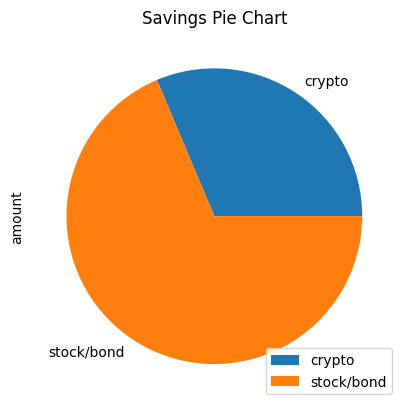

In [14]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title='Savings Pie Chart', legend=True)


In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

# Calculate total amount of savings
total_portfolio_value = total_crypto + total_stock_bond
total_portfolio_value

# Validate saving health
#total portfolio value is greater than the emergency fund value
if total_portfolio_value> emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

#Else if the total portfolio value is equal to the emergency fund value
elif total_portfolio_value == emergency_fund:
    print("Congratulations! You have reached an important financial goal.")

#(Else the total portfolio vaule is less than the emergency fund. Subtract the total portfolio value from the emergency fund value.)
else:
    shortfall = emergency_fund - total_portfolio_value
    print(f"You are ${shortfall} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-02-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-02-09', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the ticker information
tickers = ["AGG","SPY"]


df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data


# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]== "AGG"].drop("symbol",axis=1)
SPY = df_stock_data[df_stock_data["symbol"]== "SPY"].drop("symbol",axis=1)



# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_stock_data                         

# Display sample data
df_stock_data.head(10)

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-02-11 05:00:00+00:00  107.23  107.2800  107.1500       11414  107.23   
2019-02-12 05:00:00+00:00  107.25  107.2600  107.1217       12632  107.22   
2019-02-13 05:00:00+00:00  107.06  107.1400  107.0100        9458  107.08   
2019-02-14 05:00:00+00:00  107.22  107.3500  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.3100  107.1900       10422  107.25   
2019-02-19 05:00:00+00:00  107.36  107.4500  107.2800       13903  107.43   
2019-02-20 05:00:00+00:00  107.37  107.3900  107.2843       11863  107.37   
2019-02-21 05:00:00+00:00  107.13  107.1800  107.1000       11803  107.16   
2019-02-22 05:00:00+00:00  107.40  107.5161  107.2200       11766  107.25   
2019-02-25 05:00:00+00:00  107.37  107.4000  107.3000       12998  107.35   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2019-02-11 05:00:00+00:00  3843906  107.214412  270.69  271.49  270.0300   
2019-02-12 05:00:00+00:00  3574419  107.199711  274.06  274.52  272.3400   
2019-02-13 05:00:00+00:00  2738473  107.076374  274.95  275.93  274.5600   
2019-02-14 05:00:00+00:00  3081841  107.230875  274.46  275.64  272.8700   
2019-02-15 05:00:00+00:00  2709313  107.283078  277.38  277.41  276.1300   
2019-02-19 05:00:00+00:00  6470343  107.352474  277.88  278.58  276.4700   
2019-02-20 05:00:00+00:00  3579496  107.344759  278.43  278.92  277.2500   
2019-02-21 05:00:00+00:00  3898093  107.139647  277.46  278.10  276.3450   
2019-02-22 05:00:00+00:00  2915811  107.411193  279.16  279.36  277.4029   
2019-02-25 05:00:00+00:00  4451424  107.357102  279.59  281.31  279.4300   

                                                                       
                          trade_count      open    volume        vwap  
timestamp                                                              
2019-02-11 05:00:00+00:00      288513  271.2000  69530504  270.651928  
2019-02-12 05:00:00+00:00      308611  272.4200  73533121  273.805429  
2019-02-13 05:00:00+00:00      294127  275.0300  66896771  275.189334  
2019-02-14 05:00:00+00:00      395160  273.7800  84116124  274.380189  
2019-02-15 05:00:00+00:00      367592  276.3600  98445574  276.676365  
2019-02-19 05:00:00+00:00      237890  276.4813  60016568  277.757532  
2019-02-20 05:00:00+00:00      326117  277.8100  77459348  278.158744  
2019-02-21 05:00:00+00:00      299168  277.7000  64937725  277.333262  
2019-02-22 05:00:00+00:00      288918  278.1100  81379467  278.644216  
2019-02-25 05:00:00+00:00      278276  280.7300  70022314  280.224337

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCSimulation

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-02-11 05:00:00+00:00  107.23  107.28  107.1500       11414  107.23   
2019-02-12 05:00:00+00:00  107.25  107.26  107.1217       12632  107.22   
2019-02-13 05:00:00+00:00  107.06  107.14  107.0100        9458  107.08   
2019-02-14 05:00:00+00:00  107.22  107.35  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.31  107.1900       10422  107.25   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-02-11 05:00:00+00:00  3843906  107.214412          NaN  270.69  271.49   
2019-02-12 05:00:00+00:00  3574419  107.199711     0.000187  274.06  274.52   
2019-02-13 05:00:00+00:00  2738473  107.076374    -0.001772  274.95  275.93   
2019-02-14 05:00:00+00:00  3081841  107.230875     0.001494  274.46  275.64   
2019-02-15 05:00:00+00:00  2709313  107.283078     0.000746  277.38  277.41   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2019-02-11 05:00:00+00:00  270.03      288513  271.20  69530504  270.651928   
2019-02-12 05:00:00+00:00  272.34      308611  272.42  73533121  273.805429   
2019-02-13 05:00:00+00:00  274.56      294127  275.03  66896771  275.189334   
2019-02-14 05:00:00+00:00  272.87      395160  273.78  84116124  274.380189   
2019-02-15 05:00:00+00:00  276.13      367592  276.36  98445574  276.676365   

                                        
                          daily_return  
timestamp                               
2019-02-11 05:00:00+00:00          NaN  
2019-02-12 05:00:00+00:00     0.012450  
2019-02-13 05:00:00+00:00     0.003247  
2019-02-14 05:00:00+00:00    -0.001782  
2019-02-15 05:00:00+00:00     0.010639

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 110.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 120.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 130.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 140.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 150.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 160.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 170.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 180.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 190.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 200.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 210.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 220.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 230.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 240.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 250.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 260.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 270.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 280.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 290.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 300.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 310.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 320.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 330.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 340.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 350.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 360.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 370.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 380.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 390.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 400.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 410.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 420.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 430.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 440.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 450.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 460.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 470.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 480.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 490.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002989,0.999142,0.998367,0.999396,1.003736,1.001351,0.991803,1.000248,1.003195,1.002150,...,1.001954,0.998587,1.003112,1.004226,1.012446,1.002867,1.002883,1.004406,1.000437,1.009499
2,1.000972,0.998773,0.985099,0.998347,1.004465,0.996375,1.001108,0.994710,1.012112,1.000436,...,0.993620,0.999599,1.003277,0.992931,1.014656,1.003264,0.997568,1.008064,1.005617,1.012233
3,0.986749,1.003276,0.990597,1.005395,1.007148,1.004510,1.003737,1.003935,1.008863,0.996168,...,1.003594,0.997376,0.998644,0.998605,1.014900,1.006651,0.990399,1.010792,1.001905,1.019287
4,0.989141,1.008524,0.993433,1.005949,1.009196,0.995414,1.003903,0.999070,1.009088,0.997620,...,1.005417,0.994104,0.991677,0.995231,1.006065,1.016967,0.986712,1.005451,1.002862,1.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.388735,3.628782,6.310324,3.280396,3.995452,2.449078,2.972416,2.279167,2.371690,2.521647,...,1.566989,5.889693,4.078466,3.080746,2.610097,7.940618,2.715695,2.609855,1.545206,1.474776
7557,1.384789,3.618006,6.283197,3.270138,4.005325,2.445705,2.963612,2.276766,2.387785,2.536389,...,1.568690,5.959355,4.086212,3.068826,2.621936,7.959485,2.721955,2.623844,1.529572,1.484154
7558,1.401982,3.601877,6.268465,3.287870,4.009695,2.443774,2.972418,2.261062,2.388287,2.551396,...,1.571126,5.943587,4.073120,3.056364,2.614694,7.984873,2.692529,2.645945,1.534924,1.507071
7559,1.403692,3.588044,6.290707,3.329663,4.052670,2.425250,2.976716,2.267543,2.389697,2.544376,...,1.556430,5.950626,4.095927,3.042577,2.605276,7.963940,2.696342,2.649962,1.526325,1.491894


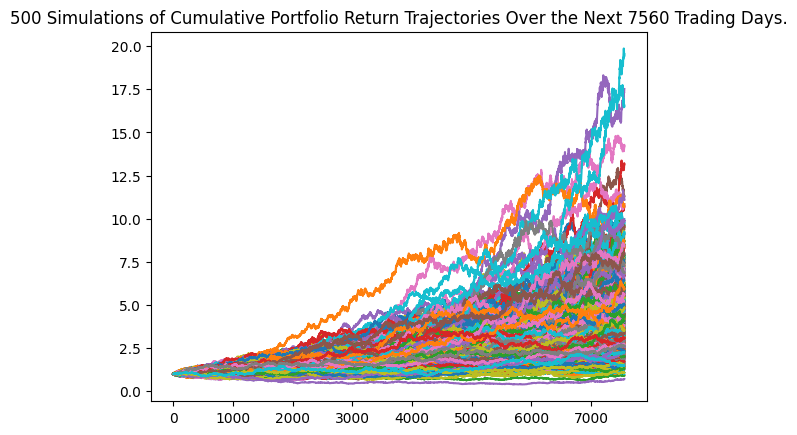

In [21]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

#save line plot
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

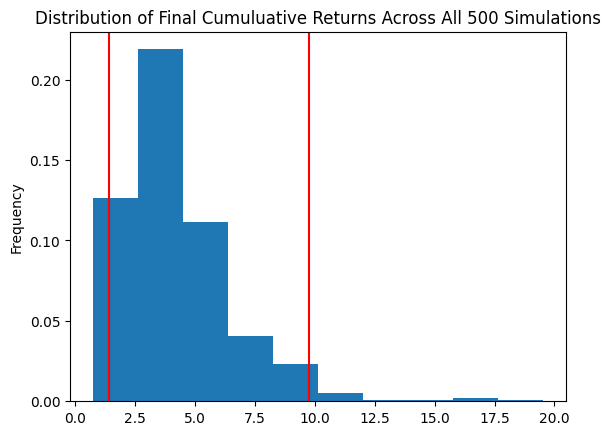

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()


# Save dist plot for future usage
dist_plot.get_figure().savefig("MC_thirtyyear_distribution_plot.png", bbox_inches="tight")


### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_thirtyyear
stats = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
stats

count           500.000000
mean              4.217838
std               2.353326
min               0.718128
25%               2.665568
50%               3.564932
75%               5.113439
max              19.541376
95% CI Lower      1.409362
95% CI Upper      9.746139
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28187.24 and $194922.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $42280.86 and $292384.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-02-11 05:00:00+00:00  107.23  107.28  107.1500       11414  107.23   
2019-02-12 05:00:00+00:00  107.25  107.26  107.1217       12632  107.22   
2019-02-13 05:00:00+00:00  107.06  107.14  107.0100        9458  107.08   
2019-02-14 05:00:00+00:00  107.22  107.35  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.31  107.1900       10422  107.25   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-02-11 05:00:00+00:00  3843906  107.214412          NaN  270.69  271.49   
2019-02-12 05:00:00+00:00  3574419  107.199711     0.000187  274.06  274.52   
2019-02-13 05:00:00+00:00  2738473  107.076374    -0.001772  274.95  275.93   
2019-02-14 05:00:00+00:00  3081841  107.230875     0.001494  274.46  275.64   
2019-02-15 05:00:00+00:00  2709313  107.283078     0.000746  277.38  277.41   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2019-02-11 05:00:00+00:00  270.03      288513  271.20  69530504  270.651928   
2019-02-12 05:00:00+00:00  272.34      308611  272.42  73533121  273.805429   
2019-02-13 05:00:00+00:00  274.56      294127  275.03  66896771  275.189334   
2019-02-14 05:00:00+00:00  272.87      395160  273.78  84116124  274.380189   
2019-02-15 05:00:00+00:00  276.13      367592  276.36  98445574  276.676365   

                                        
                          daily_return  
timestamp                               
2019-02-11 05:00:00+00:00          NaN  
2019-02-12 05:00:00+00:00     0.012450  
2019-02-13 05:00:00+00:00     0.003247  
2019-02-14 05:00:00+00:00    -0.001782  
2019-02-15 05:00:00+00:00     0.010639

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 110.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 180.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 190.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 220.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 250.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 260.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 350.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 420.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 430.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 480.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 490.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004747,0.989534,0.996303,0.998296,1.002471,0.997479,1.002630,0.995902,1.002938,1.003376,...,1.005395,0.998509,0.997519,1.001462,0.996874,1.003510,0.998801,0.997258,0.995593,0.986869
2,0.993946,0.980153,0.984312,0.993999,0.998885,1.005625,0.997957,0.994812,0.992871,1.005159,...,1.009422,0.999805,0.997593,0.994446,1.001811,1.010597,0.988668,0.994367,0.991208,0.984853
3,0.988136,0.990939,0.976726,0.999381,1.012994,1.014190,1.006022,0.989614,0.992950,1.001984,...,1.017853,0.994438,0.992721,0.982448,1.007869,1.003973,0.988929,0.989190,0.986926,0.986060
4,0.988863,0.985116,0.978944,0.999685,1.016716,1.018040,1.013843,0.999594,0.994419,1.002915,...,1.005129,0.991032,0.988969,0.979918,1.011184,1.007626,0.982642,0.995189,0.984533,0.993299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.935876,0.863699,1.163071,1.792127,1.552364,1.128968,1.699489,1.273555,1.580060,0.793587,...,1.553225,1.202035,1.584509,1.029893,1.224762,1.600869,1.371708,1.681395,1.651597,1.219481
1257,0.941654,0.853853,1.172714,1.790719,1.541627,1.123467,1.702376,1.273005,1.589282,0.792200,...,1.533175,1.201934,1.585656,1.028137,1.223513,1.603170,1.365439,1.689676,1.654747,1.208975
1258,0.933297,0.860231,1.179768,1.790940,1.554491,1.135453,1.717167,1.269534,1.587501,0.786565,...,1.545003,1.208633,1.594825,1.023524,1.221559,1.593913,1.349408,1.692542,1.653189,1.199905
1259,0.928818,0.854227,1.191364,1.793455,1.555906,1.139298,1.727782,1.286222,1.588291,0.783602,...,1.552548,1.200956,1.606126,1.020260,1.224734,1.596029,1.352275,1.688188,1.649453,1.210570


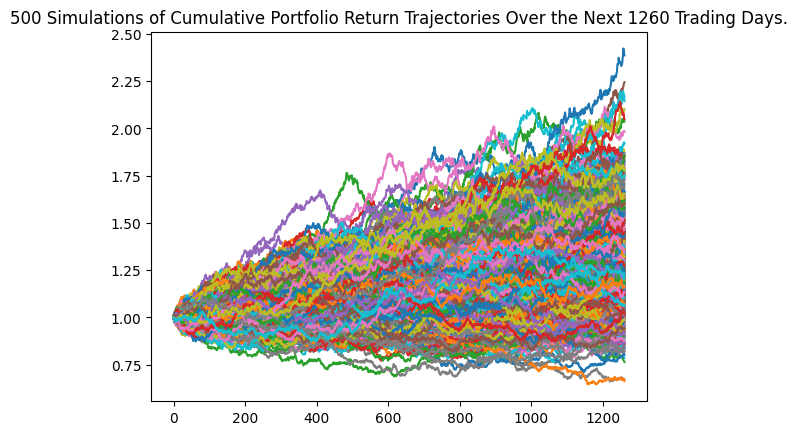

In [32]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

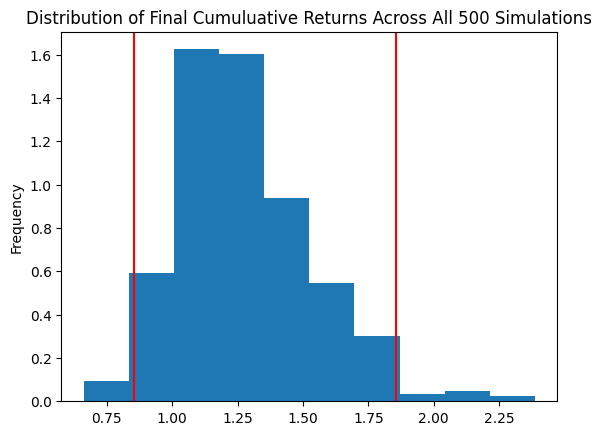

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.273767
std               0.262082
min               0.662652
25%               1.087642
50%               1.236366
75%               1.414139
max               2.386462
95% CI Lower      0.855745
95% CI Upper      1.854900
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats[8]*initial_investment,2)
ci_upper_five = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $14093.62 and $97461.39


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MCSimulation

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-02-11 05:00:00+00:00  107.23  107.28  107.1500       11414  107.23   
2019-02-12 05:00:00+00:00  107.25  107.26  107.1217       12632  107.22   
2019-02-13 05:00:00+00:00  107.06  107.14  107.0100        9458  107.08   
2019-02-14 05:00:00+00:00  107.22  107.35  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.31  107.1900       10422  107.25   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-02-11 05:00:00+00:00  3843906  107.214412          NaN  270.69  271.49   
2019-02-12 05:00:00+00:00  3574419  107.199711     0.000187  274.06  274.52   
2019-02-13 05:00:00+00:00  2738473  107.076374    -0.001772  274.95  275.93   
2019-02-14 05:00:00+00:00  3081841  107.230875     0.001494  274.46  275.64   
2019-02-15 05:00:00+00:00  2709313  107.283078     0.000746  277.38  277.41   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2019-02-11 05:00:00+00:00  270.03      288513  271.20  69530504  270.651928   
2019-02-12 05:00:00+00:00  272.34      308611  272.42  73533121  273.805429   
2019-02-13 05:00:00+00:00  274.56      294127  275.03  66896771  275.189334   
2019-02-14 05:00:00+00:00  272.87      395160  273.78  84116124  274.380189   
2019-02-15 05:00:00+00:00  276.13      367592  276.36  98445574  276.676365   

                                        
                          daily_return  
timestamp                               
2019-02-11 05:00:00+00:00          NaN  
2019-02-12 05:00:00+00:00     0.012450  
2019-02-13 05:00:00+00:00     0.003247  
2019-02-14 05:00:00+00:00    -0.001782  
2019-02-15 05:00:00+00:00     0.010639

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 110.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 120.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 130.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 140.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 150.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 160.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 170.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 180.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 190.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 200.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 210.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 220.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 230.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 240.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 250.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 260.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 270.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 280.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 290.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 300.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 310.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 320.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 330.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 340.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 350.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 360.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 370.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 380.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 390.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 400.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 410.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 420.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 430.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 440.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 450.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 460.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 470.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 480.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

Running Monte Carlo simulation number 490.


f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
f:\Fintech - BOOTCAMP\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\CU-VIRT-FIN-PT-12-2023-U-LOLC-main\05-APIs\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fil

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004370,0.997558,0.999010,1.004269,0.990932,0.997574,0.998585,1.007556,1.007199,1.006349,...,0.995517,1.000497,1.002838,0.989220,1.004679,0.999435,0.997191,1.006774,1.009209,0.991459
2,1.002889,1.000576,0.994726,1.008882,0.998922,0.994188,0.993028,1.004739,1.013955,0.996408,...,0.988237,1.007741,0.998084,0.991015,1.000384,0.999624,0.995031,1.005406,1.010464,0.994867
3,1.004438,0.998554,0.989953,1.011940,1.007247,0.991695,0.995951,1.004601,1.009944,1.000900,...,0.986110,1.022816,0.995976,0.994113,0.991356,1.000116,0.994522,1.004485,1.012924,0.983621
4,1.008360,0.994490,0.985133,1.016373,1.010940,0.988660,0.998245,1.004377,1.001693,1.009392,...,0.987028,1.018340,1.006761,0.999919,0.977382,0.984023,0.985967,1.000253,1.011638,0.983485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.743280,1.365877,0.909801,1.381626,1.322751,2.083487,0.785858,1.553470,2.651831,1.420278,...,1.218889,2.209476,0.883094,1.893031,1.414354,1.869203,1.719145,1.111131,1.395028,1.427343
2517,1.735650,1.364739,0.915072,1.374528,1.324035,2.095008,0.785508,1.550041,2.656795,1.422212,...,1.221048,2.221983,0.883248,1.888014,1.414918,1.863476,1.717836,1.121016,1.392945,1.448962
2518,1.731617,1.350093,0.914523,1.381002,1.335853,2.083898,0.786442,1.560333,2.633984,1.437601,...,1.228633,2.221412,0.887664,1.885643,1.401723,1.868915,1.722219,1.117104,1.402670,1.460083
2519,1.739357,1.355560,0.913485,1.384892,1.333368,2.093599,0.785784,1.552215,2.630313,1.421394,...,1.229808,2.239471,0.887031,1.895703,1.394430,1.866719,1.722029,1.118295,1.397482,1.462564


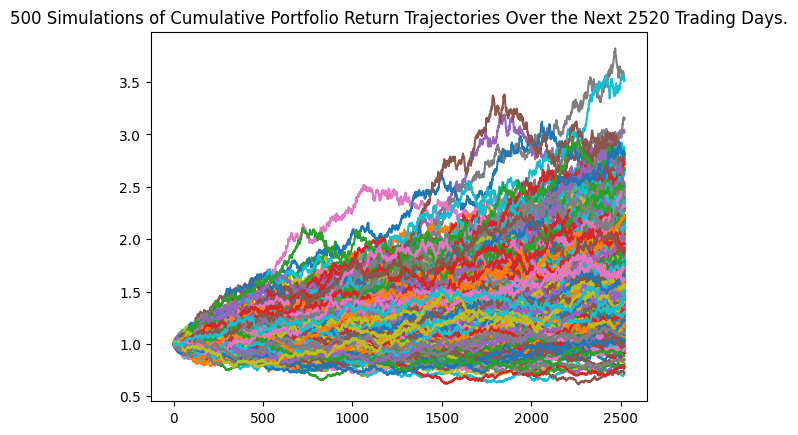

In [43]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

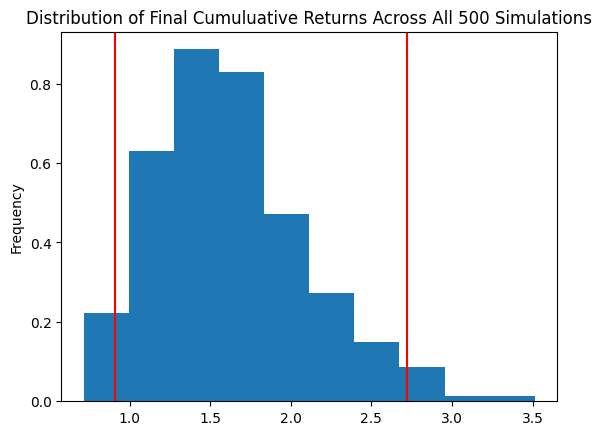

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
stats_10

count           500.000000
mean              1.625047
std               0.472778
min               0.715896
25%               1.295444
50%               1.569413
75%               1.906506
max               3.512964
95% CI Lower      0.907680
95% CI Upper      2.720324
Name: 2520, dtype: float64

In [46]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats[8]*initial_investment,2)
ci_upper_ten = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 10 years will end within in the range of $14093.62 and $97461.39
